In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
df = pd.read_csv('UCI_Credit_Card.csv', header=0)

# Convert string columns to numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Extract the features and target
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Apply PCA
pca = PCA()  
X_pca = pca.fit_transform(X_scaled)

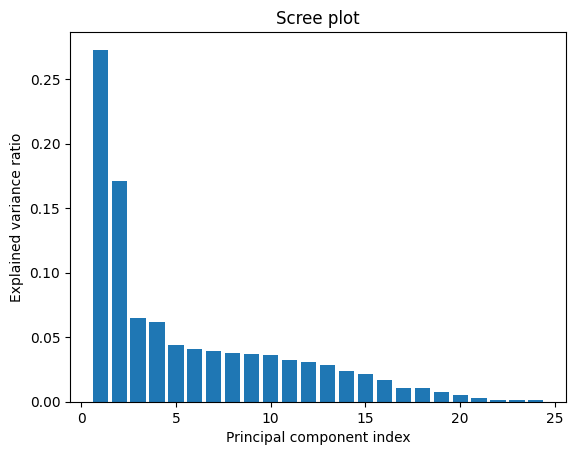

In [11]:
# Scree plot
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.title('Scree plot')
plt.show()

The elbow is at principal component index =2. So we retain the first two principal components. 

In [13]:
# Explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_[:2])

Explained variance ratio: [0.2726381  0.17083159]


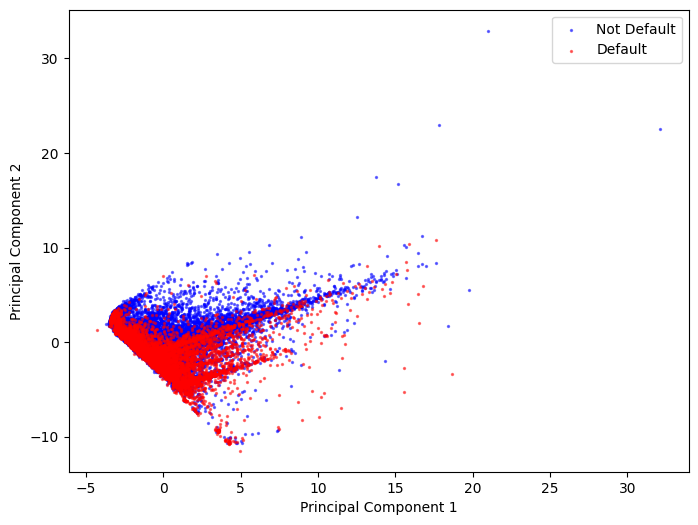

In [16]:
# Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='blue', label='Not Default', alpha=0.5, s=2)
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='red', label='Default', alpha=0.5, s=2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()